In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/research/prompt_engineering/RL
!pip install tiktoken
!pip install --upgrade "httpx<0.28"
import json
import rl
import utils
from openai import OpenAI
with open("config.json") as config_file:
    config = json.load(config_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/prompt_engineering/RL


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


The OpenAI API does not have a direct parameter to set a random seed for reproducibility in its responses. The behavior of the models is inherently non-deterministic due to randomness in the generation process.

Initial prompt: Find material entities.
Predictions: [['terahertz metamaterial absorber', ' vanadium dioxide (VO2)', ' graphene', ' cross-cut graphene disks (CGDs)', ' VO2 square rings (VSRs)', ' dielectric film', ' gold mirror'], ['graphene', ' metamaterial perfect absorbers', ' single-mode fiber', ' photodetectors', ' broadband optoelectronic devices', ' sensor', ' communications', ' sensing'], ['metamaterial absorption device (MAD)', ' Block Dirac semimetal (BDS)', ' substrate gold', ' silica', ' top layer BDS', ' cylindrical microstructure', ' circular microstructure'], ['BaTiO3', ' ZnO', ' layered transition metal dichalcogenides', ' bismuth-layered structure materials', ' wurtzite-based semiconductors', ' graphene', ' g-C3N4', ' metal-organic frameworks'], ['MTiO3', ' bi-class catalytic materials', ' MoX2', ' ZnO', ' PVDF', ' g-C3N4'], ['Piezoelectric effect', ' sensors', ' nanogenerators', ' piezotronics', ' Atomic layer deposition (ALD)', ' materials', ' thickness', ' transitio

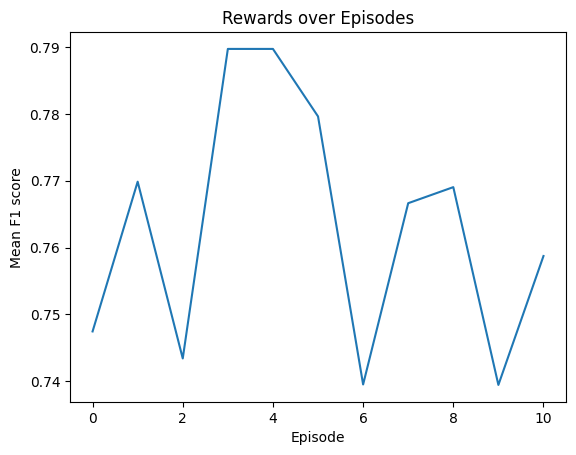

In [3]:
V_SIZE = 50000
WORD_LEN_MIN = 3
EPOCHS = 10
PROMPT_LENGTH = 7
PROMPT_INIT = "Find material entities."
LR = 0.001
HIDDEN = 64
SEED = 1234
EXP_ID = 4
PRINT_INTERVAL = 1
SAVE = False
PLOT = True
DATASET = "train"

PROMPTS, PREDICTIONS, SCORES, REWARDS = rl.do_training(
    prompt_init=PROMPT_INIT, epochs=EPOCHS, learning_rate=LR,
    v_size=V_SIZE, prompt_length=PROMPT_LENGTH, word_len_min=WORD_LEN_MIN, hidden=HIDDEN, seed=SEED,
    exp_id=EXP_ID, print_interval=PRINT_INTERVAL, save_results=SAVE, plot=PLOT,
    client=OpenAI(api_key=config["OPENAI_API_KEY"]), dataset=DATASET
    )

In [5]:
rl.do_test(prompt="Find material entities.", save_results=False, client=OpenAI(api_key=config["OPENAI_API_KEY"]), dataset="test")

Tested prompt: Find material entities.
Predictions: [['metamaterial', ' bi-material nanocylinders', ' host medium', ' ferromagnet', ' single-domain magnetic state', ' high-permittivity dielectric', ' magnetic Mie-type resonance', ' magnetic Weyl semimetals', ' bulk effective magnetoelectric effect', ' natural materials', ' low-frequency magnetoelectric materials', ' spintronics', ' data storage', ' logic memory devices'], ['piezoelectric materials', ' D2O', ' (hetero)aryl iodides'], ['Reactive oxygen species (ROS)', ' molecular oxygen', ' proteins', ' nucleic acids', ' lipids', ' inflammatory responses', ' inflammatory diseases']]
Scores: [0.6666666666666666, 0.5454545454545454, 0.6250000000000001]
Reward: 0.6123737373737373



In [ ]:
# results_metamaterials = utils.load_results("d_metamaterials_p_Find material entities._e_10_l_0.001_v_50000_len_7_h_64_s_1234_id_")
# results_piezoelectric = utils.load_results("d_piezoelectric_p_Find material entities._e_10_l_0.001_v_50000_len_7_h_64_s_1234_id_")
# results_biomaterials = utils.load_results("d_biomaterials_p_Find material entities._e_10_l_0.001_v_50000_len_7_h_64_s_1234_id_")
# utils.plot_results_multiple([results_metamaterials, results_piezoelectric, results_biomaterials],
#                             labels=["Metamaterials", "Piezoelectric materials", "Biomaterials"], fontsize=12, figsize=(8, 6))
# all_results = utils.load_results("d_metamaterials_p_Find material entities._e_10_l_0.001_v_100000_len_7_h_64_s_1234_id")
# utils.plot_results(all_results, fontsize=12, figsize=(8, 6))